# Recap: Effectiveness of Perceptron Learning

In this example, we want to demonstrate how a Perceptron can effectively classify linearly separable data where Linear Regression fails to model the hard threshold decision boundary.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Perceptron
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
# Create dataset: x = study hours, y = pass(1) or fail(0)
X = np.array([1, 2, 2.5, 3, 3.5, 4.5,5, 6, 6.5, 7, 8, 9]).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 0,0, 1, 1, 1, 1, 1, 1])


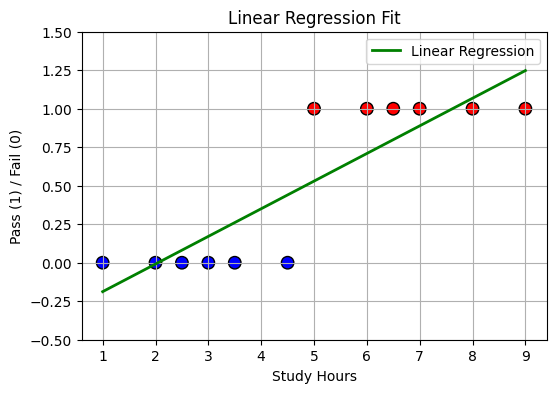

In [2]:
# Fit Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# Plot Linear Regression
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k', s=80)
plt.plot(X, y_pred_lin, color='green', linewidth=2, label='Linear Regression')
plt.title("Linear Regression Fit")
plt.xlabel("Study Hours")
plt.ylabel("Pass (1) / Fail (0)")
plt.ylim(-0.5, 1.5)
plt.legend()
plt.grid(True)
plt.show()


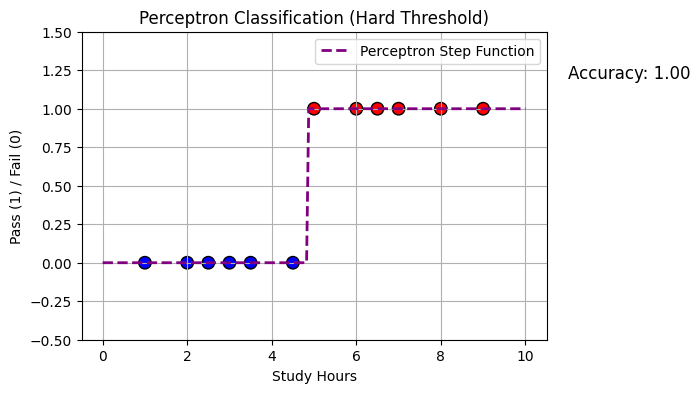

In [3]:
# Fit Perceptron
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X, y)
y_pred_perc = perceptron.predict(X)

# Generate decision boundary for perceptron
coef = perceptron.coef_[0][0]
intercept = perceptron.intercept_[0]
boundary_x = (0.5 - intercept) / coef

# Plot Perceptron hard threshold function
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k', s=80)

# Step function from perceptron
x_vals = np.linspace(0, 10, 200)
y_step = (x_vals >= boundary_x).astype(int)
plt.plot(x_vals, y_step, color='purple', linestyle='--', linewidth=2, label='Perceptron Step Function')
plt.text(11, 1.2, f'Accuracy: {accuracy_score(y, y_pred_perc ):.2f}', fontsize=12)
plt.title("Perceptron Classification (Hard Threshold)")
plt.xlabel("Study Hours")
plt.ylabel("Pass (1) / Fail (0)")
plt.ylim(-0.5, 1.5)
plt.legend()
plt.grid(True)
plt.show()


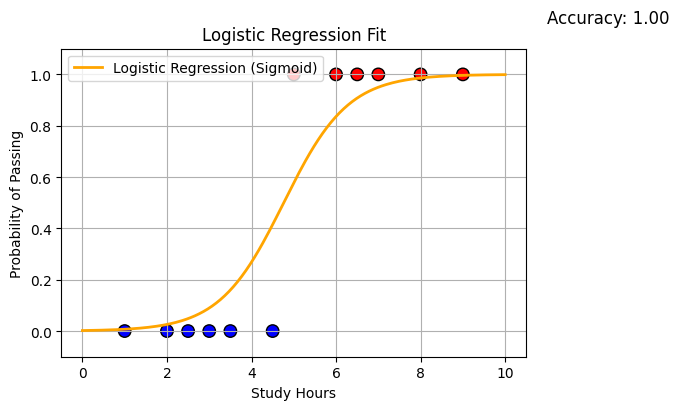

In [4]:
from sklearn.linear_model import LogisticRegression

# Fit Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Plot Logistic Regression sigmoid curve
x_vals = np.linspace(0, 10, 200).reshape(-1, 1)
y_probs = log_reg.predict_proba(x_vals)[:, 1]
y_pred_log = log_reg.predict(X.reshape(-1,1))
plt.figure(figsize=(6, 4))
plt.scatter(X, y, c=y, cmap='bwr', edgecolors='k', s=80)
plt.plot(x_vals, y_probs, color='orange', linewidth=2, label='Logistic Regression (Sigmoid)')
plt.title("Logistic Regression Fit")
plt.xlabel("Study Hours")
plt.ylabel("Probability of Passing")
plt.ylim(-0.1, 1.1)
plt.text(11, 1.2, f'Accuracy: {accuracy_score(y, y_pred_log ):.2f}', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


## 2 dimensional inputs

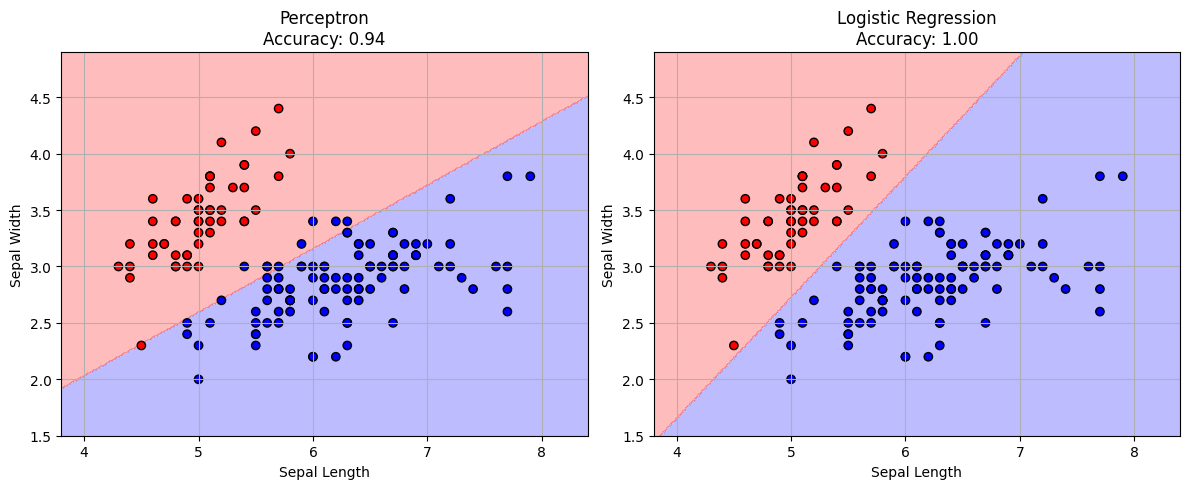

In [5]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare binary classification task from IRIS
iris = load_iris()
X = iris.data[:, :2]  # only sepal length and width
y = (iris.target == 0).astype(int)  # 1 if Iris-setosa, else 0

# Fit Perceptron
perc = Perceptron(max_iter=1000, tol=1e-3)
perc.fit(X, y)
y_pred_perc = perc.predict(X)
acc_perc = accuracy_score(y, y_pred_perc)

# Fit Logistic Regression
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred_log = logreg.predict(X)
acc_log = accuracy_score(y, y_pred_log)

# Visualization
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, 300),
                     np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, 300))
grid = np.c_[xx.ravel(), yy.ravel()]

# Perceptron boundary
Z_perc = perc.predict(grid).reshape(xx.shape)
plt.figure(figsize=(12, 5))

# Plot Perceptron
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_perc, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title(f"Perceptron\nAccuracy: {acc_perc:.2f}")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.grid(True)

# Logistic boundary
Z_log = logreg.predict(grid).reshape(xx.shape)

# Plot Logistic Regression
plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_log, alpha=0.3, cmap='bwr')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.title(f"Logistic Regression\nAccuracy: {acc_log:.2f}")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.grid(True)

plt.tight_layout()
plt.show()


In [6]:
logreg.intercept_

array([8.32315487])

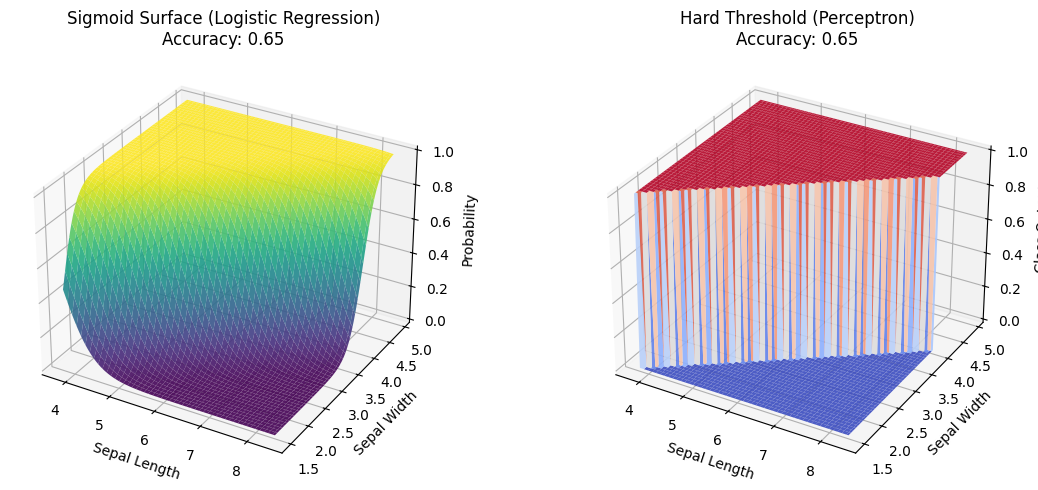

In [7]:
# Load IRIS data
iris = load_iris()
X = iris.data[:, :2]  # sepal length and width
y = (iris.target == 0).astype(int)  # Iris-setosa vs not

# Create grid for plotting
x_vals = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
y_vals = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
xx, yy = np.meshgrid(x_vals, y_vals)

# Simulated weights and bias (just for visualizing surfaces)
w = np.array([-3,  5.5])
b = 3
z = w[0] * xx + w[1] * yy + b

# Logistic Regression (Sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid_vals = sigmoid(z)
perc_vals = (z >= 0).astype(float)

# Predict using the same weights and bias
z_data = X @ w + b
sigmoid_pred = (sigmoid(z_data) >= 0.5).astype(int)
perc_pred = (z_data >= 0).astype(int)

# Calculate accuracy
acc_log = accuracy_score(y, sigmoid_pred)
acc_perc = accuracy_score(y, perc_pred)

# Plot
fig = plt.figure(figsize=(12, 5))

# Sigmoid surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(xx, yy, sigmoid_vals, cmap='viridis', alpha=0.9)
ax1.set_title(f'Sigmoid Surface (Logistic Regression)\nAccuracy: {acc_log:.2f}')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_zlabel('Probability')

# Hard threshold surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx, yy, perc_vals, cmap='coolwarm', alpha=0.9)
ax2.set_title(f'Hard Threshold (Perceptron)\nAccuracy: {acc_perc:.2f}')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_zlabel('Class Output')

plt.tight_layout()
plt.show()


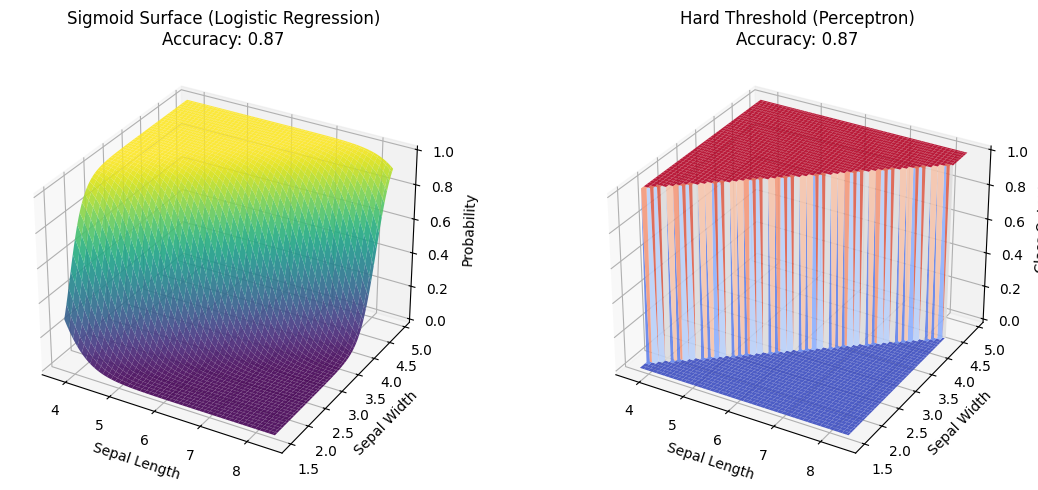

In [8]:
# Load IRIS data
iris = load_iris()
X = iris.data[:, :2]  # sepal length and width
y = (iris.target == 0).astype(int)  # Iris-setosa vs not

# Create grid for plotting
x_vals = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
y_vals = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
xx, yy = np.meshgrid(x_vals, y_vals)

# Simulated weights and bias (just for visualizing surfaces)
w = np.array([-3,  5])
b = 3
z = w[0] * xx + w[1] * yy + b

# Logistic Regression (Sigmoid)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

sigmoid_vals = sigmoid(z)
perc_vals = (z >= 0).astype(float)

# Predict using the same weights and bias
z_data = X @ w + b
sigmoid_pred = (sigmoid(z_data) >= 0.5).astype(int)
perc_pred = (z_data >= 0).astype(int)

# Calculate accuracy
acc_log = accuracy_score(y, sigmoid_pred)
acc_perc = accuracy_score(y, perc_pred)

# Plot
fig = plt.figure(figsize=(12, 5))

# Sigmoid surface
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(xx, yy, sigmoid_vals, cmap='viridis', alpha=0.9)
ax1.set_title(f'Sigmoid Surface (Logistic Regression)\nAccuracy: {acc_log:.2f}')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')
ax1.set_zlabel('Probability')

# Hard threshold surface
ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(xx, yy, perc_vals, cmap='coolwarm', alpha=0.9)
ax2.set_title(f'Hard Threshold (Perceptron)\nAccuracy: {acc_perc:.2f}')
ax2.set_xlabel('Sepal Length')
ax2.set_ylabel('Sepal Width')
ax2.set_zlabel('Class Output')

plt.tight_layout()
plt.show()
